# AI 04.2 Iris

> 학번: 2019452068
>
> 이름: 박규선

---


### 1. Prepare Data

---

#### Iris Data

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

* sepal(꽃받침) length in cm
* sepal(꽃받침) width in cm
* petal(꽃잎) length in cm
* petal(꽃잎) width in cm

class: 

- Iris Setosa
- Iris Versicolour
- Iris Virginica

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn import datasets


In [0]:
iris = datasets.load_iris()

# sepal length in cm, sepal width in cm
X = iris.data
Y = iris.target

pool = np.arange(X.shape[0])
np.random.shuffle(pool)

train_mask = pool[:120]
test_maks = pool[120:]

train_x = X[train_mask]
train_y = Y[train_mask]

test_x = X[test_maks]
test_y = Y[test_maks]


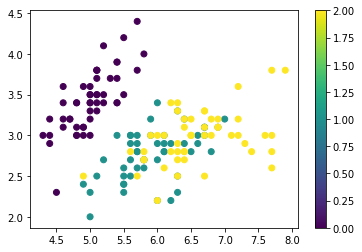

In [18]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()
plt.show()

### 2. Define Model

---

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [0]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [0]:
def cross_entropy_loss(y_hat, y):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
        
    if y.size == y_hat.size:
        y = y.argmax(axis=1)
             
    batch_size = y_hat.shape[0]
    
    return - np.sum( np.log( y_hat[np.arange(batch_size), y] + 1e-7) ) / batch_size


In [0]:
def numerical_gradient(f, x):
    h = 0.01
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

In [0]:

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']
    
        # Edit this
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y_hat = softmax(a2)

        return y_hat
        
    def loss(self, x, y):
      
        y_hat = self.predict(x)

        return cross_entropy_loss(y_hat, y) # Edit this
    
    def n_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def accuracy(self, x, y):
        y_hat = self.predict(x)
        y_hat = np.argmax(y_hat, axis=1)

        accuracy = np.sum(y_hat == y) / float(x.shape[0])
        return accuracy
    


### 3. Train Model

---

In [25]:
learning_rate = 0.5

net = TwoLayerNet(train_x.shape[1], 10, 3, 3)

train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in range(5000):
    
    # 기울기 계산
    grad = net.n_gradient(train_x, train_y) # Edit this
    
    # 매개변수 갱신
    for key in net.params:
        net.params[key] -= learning_rate * grad[key] # Edit this
                
    # 학습 경과 기록
    loss = net.loss(train_x, train_y) # Edit this    
    train_loss_list.append(loss)
    
    # 정확도 출력
    if i % 50 == 0:
        train_acc = net.accuracy(train_x, train_y)
        test_acc = net.accuracy(test_x, test_y)
        print('iter: {} loss: {} test accuracy: {:.4f} train accuracy: {:.4f}'.format(i, loss, net.accuracy(test_x, test_y), net.accuracy(train_x, train_y) ))
        train_acc_list.append( train_acc )
        test_acc_list.append( test_acc )
        

iter: 0 loss: 6.174898999184573 test accuracy: 0.3333 train accuracy: 0.3333
iter: 50 loss: 0.6587090889860543 test accuracy: 0.6333 train accuracy: 0.6500
iter: 100 loss: 0.5393409419695735 test accuracy: 0.6000 train accuracy: 0.6417
iter: 150 loss: 0.5086591648123032 test accuracy: 0.5667 train accuracy: 0.6167
iter: 200 loss: 0.4952073666074627 test accuracy: 0.5667 train accuracy: 0.6167
iter: 250 loss: 0.4876880020003492 test accuracy: 0.5667 train accuracy: 0.6083
iter: 300 loss: 0.48287637494798635 test accuracy: 0.4333 train accuracy: 0.4750
iter: 350 loss: 0.47951508260534653 test accuracy: 0.6667 train accuracy: 0.6667
iter: 400 loss: 0.477009858765193 test accuracy: 0.6667 train accuracy: 0.6833
iter: 450 loss: 0.47503573025322626 test accuracy: 0.7333 train accuracy: 0.7167
iter: 500 loss: 0.47338483960257904 test accuracy: 0.7667 train accuracy: 0.7167
iter: 550 loss: 0.47188857394752753 test accuracy: 0.7667 train accuracy: 0.7250
iter: 600 loss: 0.47036406287382787 test

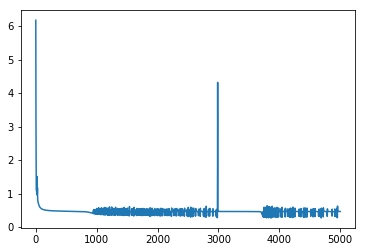

In [26]:
plt.plot(train_loss_list)
plt.show()

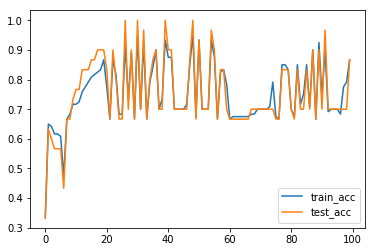

In [27]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.legend()
plt.show()

### 4. Test Model

---

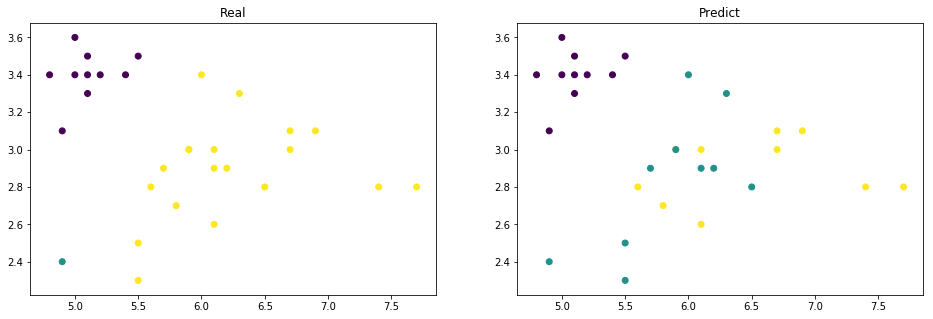

In [28]:
test_y_hat = net.predict(test_x)
test_y_hat = np.argmax(test_y_hat, axis=1)

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(test_x[:, 0], test_x[:, 1], c = test_y_hat)
ax2.scatter(test_x[:, 0], test_x[:, 1], c = test_y)

ax1.set_title('Real')
ax2.set_title('Predict')

plt.show()